In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# SIFT vs. ORB

(853, 640, 3) (853, 640)


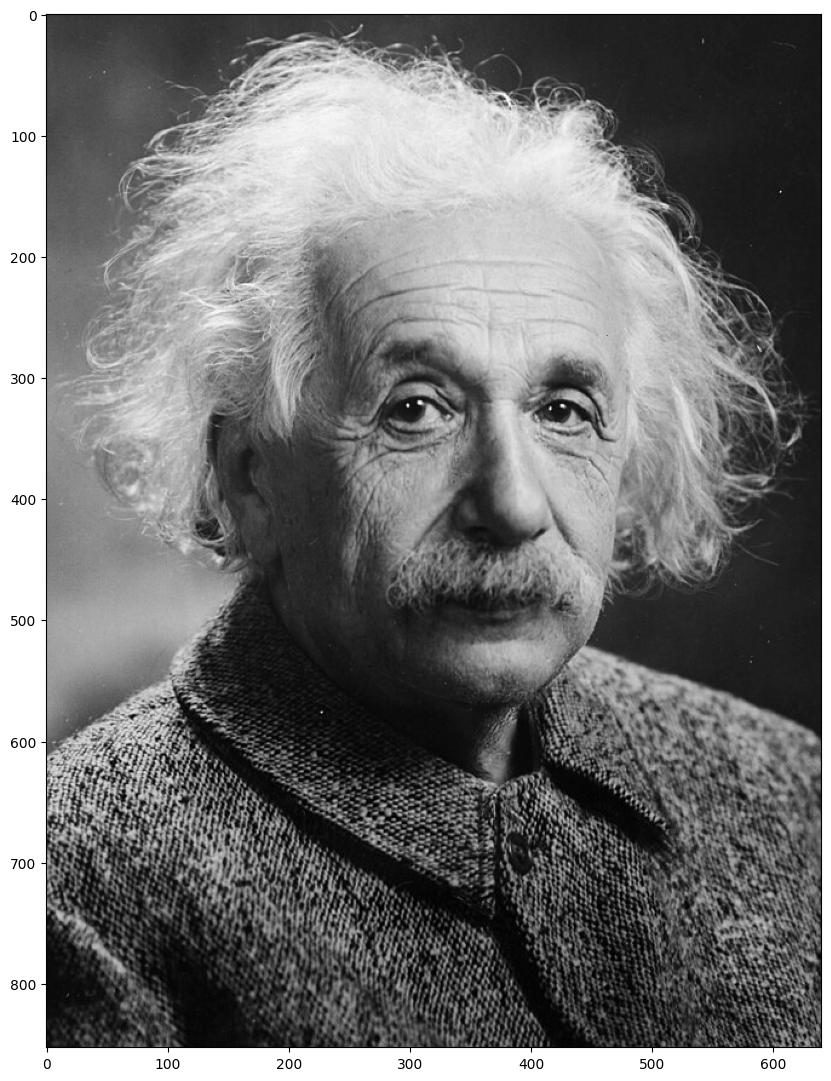

In [7]:
image1 = cv2.imread('Albert1.jpg')
bw_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
print(image1.shape, bw_image1.shape)
plt.imshow(bw_image1, cmap="gray")

In [8]:
def get_detector_matcher(name):
    detector = None
    norm = None
    matcher = None
    FLANN_INDEX_KDTREE = 1
    FLANN_INDEX_LSH = 6
    chunks = name.split('-')
    if(chunks[0] == 'sift'):
        detector = cv2.SIFT.create()
        norm = cv2.NORM_L2
    elif(chunks[0] == 'surf'):
        detector = cv2.xfeatures2d.SURF() # If you want to use it, set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
        norm = cv2.NORM_L2
    elif(chunks[0] == 'orb'):
        detector = cv2.ORB_create(400)
        norm = cv2.NORM_HAMMING
    else:
        return None, None
    
    if('flann' in chunks):
        if(norm == cv2.NORM_L2):
            flann_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        else:
            flann_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
        
        matcher = cv2.FlannBasedMatcher(flann_params, {})
    else:
        matcher = cv2.BFMatcher(norm)
    return detector, matcher     

Detector: SIFT
Matcher: BFMatcher
Keypoints found: 8271
Keypoint object sample: 
	point (2.5008959770202637, 646.5032348632812), size: 1.918950080871582, angle: 40.080596923828125
	point (2.5008959770202637, 646.5032348632812), size: 1.918950080871582, angle: 199.787841796875
Detector: ORB
Matcher: BFMatcher
Keypoints found: 400
Keypoint object sample: 
	point (40.0, 629.0), size: 31.0, angle: 285.97393798828125
	point (479.0, 644.0), size: 31.0, angle: 300.3533935546875


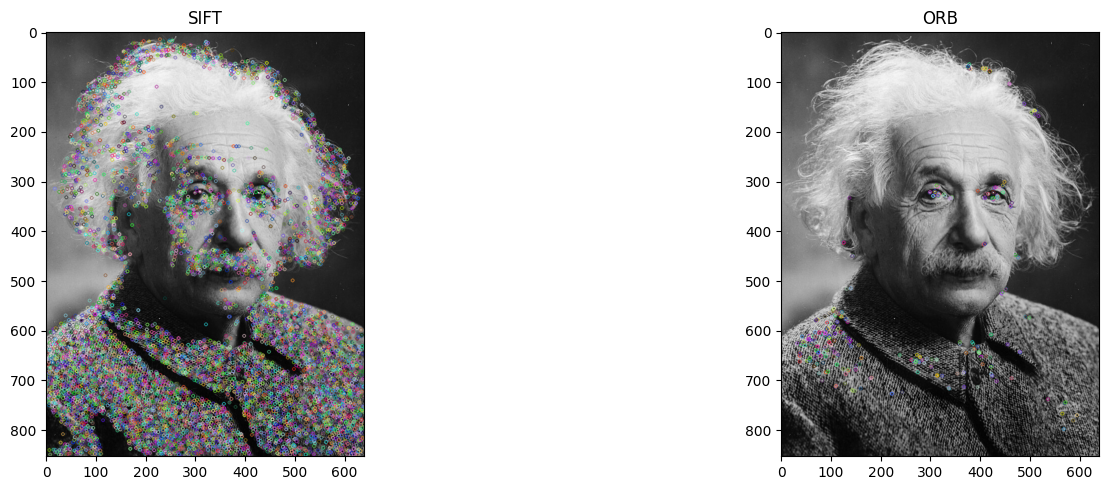

In [9]:
detectors = ['sift', 'orb']

f, axarr = plt.subplots(1, len(detectors), figsize=(15,5))

for i, detector_name in enumerate(detectors):
    # Initialize descriptor, i.e. the keypoints detector
    detector, matcher = get_detector_matcher(detector_name)
    print(f"Detector: {detector.__class__.__name__}\nMatcher: {matcher.__class__.__name__}" ) 

    # Find the features on the image
    kp, desc = detector.detectAndCompute(bw_image1, None)
    print(f"Keypoints found: {len(kp)}")
    print(f"Keypoint object sample: \n\tpoint {kp[0].pt}, size: {kp[0].size}, angle: {kp[0].angle}\n\tpoint {kp[1].pt}, size: {kp[1].size}, angle: {kp[1].angle}")

    # Create an image on which we will draw the keypoints
    image1_w_kp = np.zeros_like(bw_image1) 

    # Draw the identified keypoints
    image1_w_kp = cv2.drawKeypoints(bw_image1, kp, image1_w_kp, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    
    img = axarr[i].imshow(image1_w_kp)
    axarr[i].set_title(detector_name.upper())

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

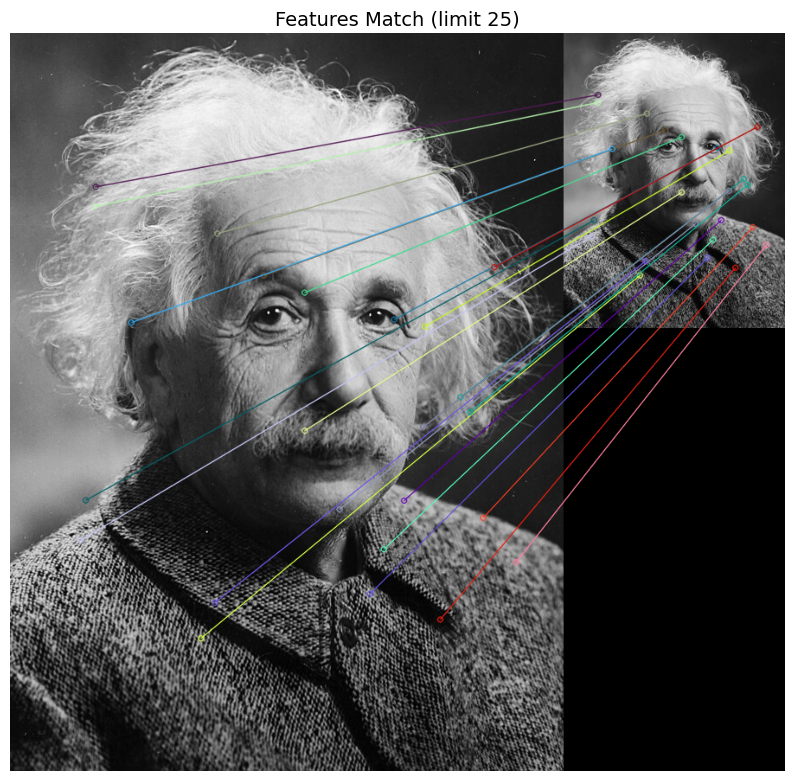

In [10]:
image2 = cv2.imread('Albert2.jpg')
bw_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

detector, matcher = get_detector_matcher("sift")

keypoints_image1, descriptors_image1 = detector.detectAndCompute(image1,None)
keypoints_image2, descriptors_image2 = detector.detectAndCompute(image2,None)

matches = matcher.match(descriptors_image1, descriptors_image2)
matches = sorted(matches, key = lambda x: x.distance)

match_limit = 25

img_match = cv2.drawMatches(image1, keypoints_image1, image2, keypoints_image2, matches[:match_limit], image1, flags=2)

plt.rcParams['figure.figsize'] = (10, 15)
plt.imshow(img_match)
plt.axis("off")
plt.title(f'Features Match (limit {match_limit})', fontsize = 14)
plt.show()